In [36]:
from load_mnist import load_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_fscore_support
import time
import numpy as np

In [10]:
train_data, train_label = load_mnist("","train")
test_data,test_label = load_mnist("","t10k")

In [11]:
# pca = PCA(n_components=100)
# pca.fit(train_data)
# train_data=pca.transform(train_data)
# test_data=pca.transform(test_data)

In [12]:
train_data.shape

(60000, 784)

In [24]:
Maxdepth = [1,3,5,7,9]

In [15]:
for maxdepth in Maxdepth:
    t3 = time.time()
    clf = RandomForestClassifier(n_estimators=100, max_depth=maxdepth,random_state=0)
    scores = cross_val_score(clf, train_data, train_label, cv=10)
    t4 = time.time()
    print("Time:",str(t4-t3),"seconds\n","Scores:",scores)

44.76737093925476 seconds


In [25]:
for maxdepth in Maxdepth:
    t1 = time.time()
    clf = RandomForestClassifier(n_estimators=100, max_depth=maxdepth,random_state=0)
    clf.fit(train_data, train_label)
    pred=clf.predict(test_data)
    acc_rate = np.sum(pred == test_label) / test_label.shape[0]
    t2 = time.time()
    print("Time:",str(t2-t1),"seconds\n","Accuracy:",acc_rate)

Time: 5.647701978683472 seconds
 Accuracy: 0.3314
Time: 13.652409791946411 seconds
 Accuracy: 0.6802
Time: 22.021008014678955 seconds
 Accuracy: 0.7629
Time: 32.15287899971008 seconds
 Accuracy: 0.8059
Time: 42.44875383377075 seconds
 Accuracy: 0.8341


In [29]:
maxdepth = 9
clf = RandomForestClassifier(n_estimators=100, max_depth=maxdepth,random_state=0)
clf.fit(train_data, train_label)
pred=clf.predict(test_data)
acc_rate = np.sum(pred == test_label) / test_label.shape[0]
t2 = time.time()
print("Time:",str(t2-t1),"seconds\n","Accuracy:",acc_rate)

Time: 343.9864389896393 seconds
 Accuracy: 0.8341


In [30]:
confusion_matrix(pred, test_label)
cm = confusion_matrix(pred, test_label, labels=[0,1,2,3,4,5,6,7,8,9])
cm

array([[816,   3,   8,  20,   1,   0, 192,   0,   0,   0],
       [  0, 931,   0,   1,   1,   0,   1,   0,   2,   0],
       [ 23,  10, 722,  17, 114,   0, 150,   0,  15,   0],
       [ 67,  44,   8, 899,  53,   1,  44,   0,   3,   0],
       [  7,   4, 212,  38, 790,   0, 132,   0,   5,   0],
       [  1,   0,   0,   0,   0, 916,   0,  14,   2,   6],
       [ 70,   6,  47,  23,  39,   0, 458,   0,   7,   1],
       [  0,   0,   0,   0,   0,  61,   0, 912,   5,  54],
       [ 16,   2,   3,   2,   2,   3,  23,   0, 960,   2],
       [  0,   0,   0,   0,   0,  19,   0,  74,   1, 937]])

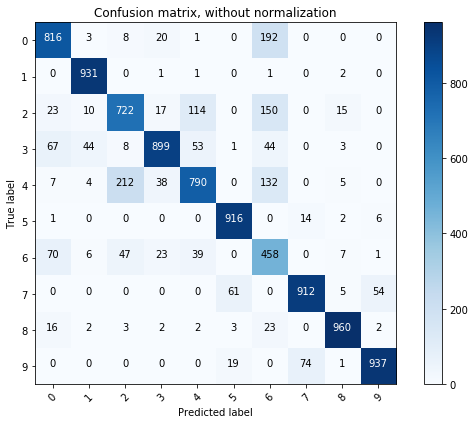

In [33]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute confusion matrix
cnf_matrix = confusion_matrix(pred, test_label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')


plt.show()

In [38]:
precision_recall_fscore_support(test_label,pred)

(array([0.78, 0.99, 0.69, 0.8 , 0.66, 0.98, 0.7 , 0.88, 0.95, 0.91]),
 array([0.82, 0.93, 0.72, 0.9 , 0.79, 0.92, 0.46, 0.91, 0.96, 0.94]),
 array([0.8 , 0.96, 0.7 , 0.85, 0.72, 0.94, 0.55, 0.9 , 0.95, 0.92]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))